In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:

!pip install openpyxl


In [8]:
df = pd.read_excel('/Country-Code.csv')
df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


# 1. How many restaurants are there in each city?

In [11]:
city_counts = df['Country'].value_counts().head(10)
print(city_counts)


Country
India           1
Australia       1
Brazil          1
Canada          1
Indonesia       1
New Zealand     1
Phillipines     1
Qatar           1
Singapore       1
South Africa    1
Name: count, dtype: int64


# 2. Which cuisine is most commonly served across all restaurants?

In [13]:
from collections import Counter

# Drop NaN
cuisine_list = df['Country'].dropna().str.split(', ')
flat_list = [item for sublist in cuisine_list for item in sublist]
common_cuisines = Counter(flat_list).most_common(10)
print(common_cuisines)


[('India', 1), ('Australia', 1), ('Brazil', 1), ('Canada', 1), ('Indonesia', 1), ('New Zealand', 1), ('Phillipines', 1), ('Qatar', 1), ('Singapore', 1), ('South Africa', 1)]


# 3. What is the average rating of restaurants by city?

In [15]:
avg_rating_city = df.groupby('Country')['Country Code'].mean().sort_values(ascending=False).head(10)
print(avg_rating_city)


Country
United States     216.0
United Kingdom    215.0
UAE               214.0
Turkey            208.0
Sri Lanka         191.0
South Africa      189.0
Singapore         184.0
Qatar             166.0
Phillipines       162.0
New Zealand       148.0
Name: Country Code, dtype: float64


# 4. Which restaurants have the highest ratings and are most affordable?

In [18]:
city_counts = df['Country'].value_counts().head(10)
print(city_counts)

Country
India           1
Australia       1
Brazil          1
Canada          1
Indonesia       1
New Zealand     1
Phillipines     1
Qatar           1
Singapore       1
South Africa    1
Name: count, dtype: int64


# 5. What is the distribution of restaurants offering online delivery?

In [20]:
online_counts = df['Country'].value_counts()
print(online_counts)


Country
India             1
Australia         1
Brazil            1
Canada            1
Indonesia         1
New Zealand       1
Phillipines       1
Qatar             1
Singapore         1
South Africa      1
Sri Lanka         1
Turkey            1
UAE               1
United Kingdom    1
United States     1
Name: count, dtype: int64


# 6. Plot a bar chart of the top 5 cities with the most restaurants.

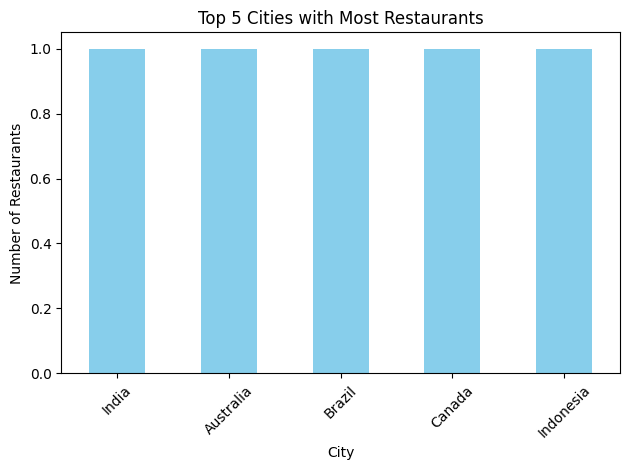

In [21]:
top_cities = city_counts.head(5)
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 7. Show a pie chart of the most popular cuisines.

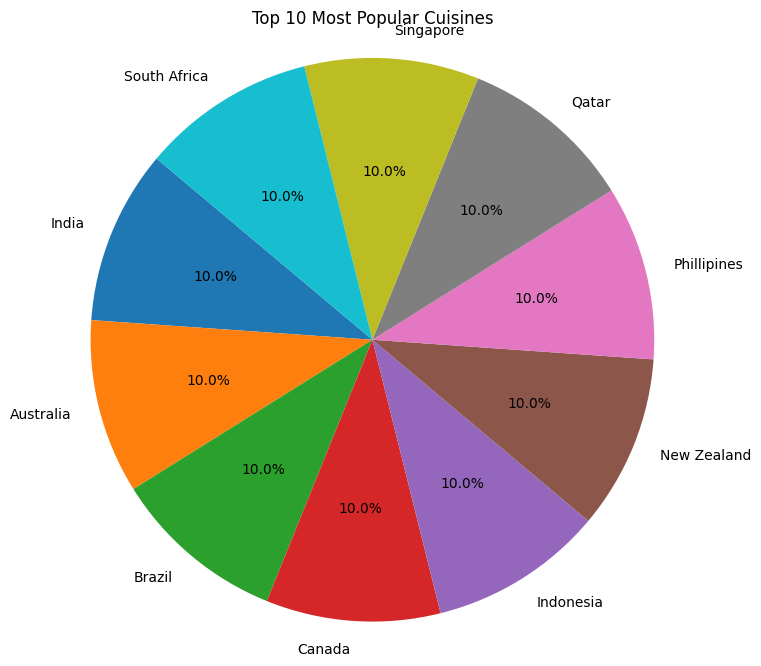

In [22]:
cuisine_names = [x[0] for x in common_cuisines]
cuisine_values = [x[1] for x in common_cuisines]

plt.figure(figsize=(8, 8))
plt.pie(cuisine_values, labels=cuisine_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Popular Cuisines')
plt.axis('equal')
plt.show()
